In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install transformers
!pip install seqeval datasets allennlp
!pip install flax
!pip install sentencepiece

     |████████████████████████████████| 3.5 MB 5.3 MB/s 
     |████████████████████████████████| 895 kB 46.0 MB/s 
     |████████████████████████████████| 67 kB 5.0 MB/s 
     |████████████████████████████████| 596 kB 50.8 MB/s 
     |████████████████████████████████| 6.8 MB 32.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 43 kB 1.1 MB/s 
     |████████████████████████████████| 312 kB 10.0 MB/s 
     |████████████████████████████████| 716 kB 38.6 MB/s 
     |████████████████████████████████| 243 kB 13.0 MB/s 
     |████████████████████████████████| 1.1 MB 38.6 MB/s 
     |████████████████████████████████| 133 kB 50.9 MB/s 
     |████████████████████████████████| 124 kB 44.3 MB/s 
     |████████████████████████████████| 1.7 MB 37.6 MB/s 
     |████████████████████████████████| 240 kB 46.1 MB/s 
  Installing build dependencies ... done
  G

In [ ]:
%cd /content/drive/MyDrive/Bert_Lime/IMDB/

/content/drive/.shortcut-targets-by-id/1CLIDh5rSBKopppgMh7zb8C3_AWNoz6B8/Bert_Lime/IMDB


In [ ]:
!ls

__MACOSX  Model  snli_1.0  snli_1.0.zip  snli_1.0.zip.1


In [ ]:
import os
from operator import itemgetter    
import numpy as np
# import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
get_ipython().magic(u'matplotlib inline')
plt.style.use('ggplot')

# from keras import models, regularizers, layers, optimizers, losses, metrics
# from keras.models import Sequential
# from keras.layers import Dense
# from tensorflow.keras.utils import to_categorical
# from keras.layers import LayerNormalization
import tensorflow as tf
from tensorflow.keras.datasets import imdb

In [ ]:

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
print(train_data)
print(train_labels)

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])
 list([1, 194, 1153, 194, 8255, 78, 228, 5, 6, 1463, 

In [ ]:
word_index = imdb.get_word_index()

reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[10]])

print(decoded_review)

1654784/1641221 [==============================] - 0s 0us/step
? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be ab

In [ ]:
import torch

In [ ]:
print(torch.cuda.is_available())

True


In [ ]:
model_version = 'bert-base-cased'
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
ac_dict = {"positive" : 1, "negative" : 0}

In [ ]:
import torch.nn as nn
import torch
!torch.cuda.clear_cache

/bin/bash: torch.cuda.clear_cache: command not found


In [ ]:
from huggingface_hub import create_repo

In [ ]:

from transformers import AutoTokenizer, AutoModel
tokenizer = AutoTokenizer.from_pretrained(model_version,
                                          bos_token = "[CLS]",
                                          eos_token = "[SEP]")
transformer_model = AutoModel.from_pretrained(model_version, output_attentions = True).to(device)
linear_layer = nn.Linear(transformer_model.config.hidden_size,
                         len(ac_dict)).to(device)
cross_entropy_layer = nn.CrossEntropyLoss()

Downloading:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/208k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/426k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/416M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
print(transformer_model.config.hidden_size)

768


In [ ]:
device

device(type='cuda', index=0)

In [ ]:
from tqdm import tqdm

In [ ]:
from typing import List, Tuple

In [ ]:
def pad_batch(elems: List[List[int]], pad_token_id: int) -> List[List[int]]:
    """Pads all lists in elems to the maximum list length of any list in 
    elems. Pads with pad_token_id.
    """
    max_len = max([len(elem) for elem in elems])
    return [elem+[pad_token_id]*(max_len-len(elem)) for elem in elems]

def load_dataset(tokenizer):
  (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
  word_index = imdb.get_word_index()

  reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

  new_train_data = []
  for tokenized_text in tqdm(train_data):
    decoded_sent = " ".join([reverse_word_index.get(word - 3, "?") for word in tokenized_text])
    # print(decoded_sent)
    new_encoded_text = tokenizer.encode(decoded_sent)
    new_train_data.append(new_encoded_text)
  
  new_test_data = []
  for tokenized_text in tqdm(test_data):
    decoded_sent = " ".join([reverse_word_index.get(word - 3, "?") for word in tokenized_text])
    new_encoded_text = tokenizer.encode(decoded_sent)
    new_test_data.append(new_encoded_text)

  return (new_train_data, train_labels), (new_test_data, test_labels)

def generator(dataset_data, dataset_label, max_len = 512, batch_size = 16):
  i = 0
  tokenized_threads, labels = [], []
  while i<len(dataset_data):
    tokenized_threads.append(dataset_data[i][:max_len])
    labels.append(dataset_label[i])
    i += 1
        
    if i%batch_size==0:
      yield (pad_batch(tokenized_threads, tokenizer.pad_token_id), 
                  labels)
      tokenized_threads, labels = [], []

In [ ]:
from itertools import chain

import torch.optim as optim

optimizer = optim.Adam(params = chain(transformer_model.parameters(),
                                      linear_layer.parameters()),
                       lr = 2e-5)

In [ ]:
(train_dataset, train_labels), (test_dataset, test_labels) = load_dataset(tokenizer)

100%|██████████| 25000/25000 [00:19<00:00, 1260.28it/s]


In [ ]:
def train(dataset_data, dataset_label, batch_size):
    global values_weight, values_bias;
    accumulate_over = 32
    
    optimizer.zero_grad()
    print("Training")
    for i, (tokenized_threads, labels) in enumerate(generator(dataset_data, dataset_label,  batch_size = batch_size)):
        
        #Cast to PyTorch tensor
        tokenized_threads = torch.tensor(tokenized_threads, device=device)
        labels = torch.tensor(labels, device=device, dtype=torch.long)


        loss = compute((tokenized_threads, 
                        labels,), False)
        
        print("\rLoss: ", loss, end = " ")

        loss.backward()

        if i%accumulate_over==accumulate_over-1:
            optimizer.step()
            optimizer.zero_grad()
            
    optimizer.step()

In [ ]:
from datasets import load_metric
metric1 = load_metric("accuracy")
metric3 = load_metric("precision")
metric4 = load_metric("f1")
metric2 = load_metric("recall")


Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.10k [00:00<?, ?B/s]

In [ ]:
def evaluate(dataset_data, dataset_label, BATCH_SIZE):
    
    int_to_labels = {v:k for k, v in ac_dict.items()}
    print('Evaluation')
    
    with torch.no_grad():
        for i, (tokenized_threads, labels) in enumerate(generator(dataset_data, dataset_label, batch_size = BATCH_SIZE)):
            # print(comp_type_labels)
            #Cast to PyTorch tensor
            tokenized_threads = torch.tensor(tokenized_threads, device=device)
            labels = torch.tensor(labels, device=device)

            preds = compute((tokenized_threads, 
                            labels,), pred=True)
            loss = compute((tokenized_threads, labels,), pred = False)
            
            metric1.add_batch(predictions=preds, 
                            references=labels,)
                            #tokenized_threads=tokenized_threads.cpu().tolist())
            metric2.add_batch(predictions=preds, 
                            references=labels,)
            metric3.add_batch(predictions=preds, 
                            references=labels,)
            metric4.add_batch(predictions=preds, 
                            references=labels,)
            
            print("\rLoss: ", loss.item(), end = " ")
    print(metric1.compute())
    print(metric2.compute())
    print(metric3.compute())
    print(metric4.compute())

In [ ]:

(train_dataset_data, train_dataset_label), (test_dataset_data, test_dataset_label) = load_dataset(tokenizer)

100%|██████████| 25000/25000 [00:22<00:00, 1129.33it/s]


In [ ]:
def compute(batch: Tuple[torch.Tensor, torch.Tensor], pred: bool=True):
    """
    Args:
        batch:  A tuple having tokenized thread of shape [batch_size, seq_len],
                component type labels of shape [batch_size, seq_len], and a global
                attention mask for Longformer, of the same shape.
        
        
        cross_entropy:  This argument will only be used if preds=False, i.e., if 
                        loss is being calculated. If True, then cross entropy loss
                        will also be added to the output loss.
    
    Returns:
        Either the predicted sequences with their scores for each element in the batch
        (if preds is True), or the loss value summed over all elements of the batch
        (if preds is False).
    """
    tokenized_threads, labels = batch
    pad_mask = torch.where(tokenized_threads!=tokenizer.pad_token_id, torch.tensor(1).to(device), torch.tensor(0).to(device))
    x = transformer_model(input_ids=tokenized_threads,
                                            attention_mask=pad_mask,)
#     print(tokenized_threads.shape)
#     print(x[0].last_hidden_state, x[1].shape, len(x[2]))
    logits = linear_layer(transformer_model(input_ids=tokenized_threads,
                                            attention_mask=pad_mask,)[0][:, 0, :])


    if(pred):
      return torch.argmax(logits, dim = 1)


    ce_loss = cross_entropy_layer(logits, labels)

    return ce_loss

In [ ]:
import numpy as np
def shuffle(data, labels):
  idx = np.random.permutation(len(data))
  x,y = np.array(data)[idx], np.array(labels)[idx]
  return x.tolist(), y.tolist()

In [ ]:
BATCH_SIZE = 6

In [ ]:
print(tokenizer.decode([101]))

[CLS]


In [ ]:
print(device)

cuda:0


In [ ]:
# n_epochs = 2
# for epoch in range(n_epochs):
#     print(f"------------EPOCH {epoch+1}---------------")
#     train_dataset_data, train_dataset_label = shuffle(train_dataset_data, train_dataset_label)
#     test_dataset_data, test_dataset_label = shuffle(test_dataset_data, test_dataset_label)
#     X_train, Y_train = train_dataset_data[:20000], train_dataset_label[:20000]
#     X_test, Y_test = test_dataset_data[:20000], test_dataset_label[:20000]
#     train(X_train, Y_train, BATCH_SIZE)
#     print("Test accuracy")
#     evaluate(X_test, Y_test, BATCH_SIZE)

In [ ]:
# test_dataset_data, test_dataset_label = shuffle(test_dataset_data[:100],  test_dataset_label[:100])
# evaluate(test_dataset_data, test_dataset_label, BATCH_SIZE)
  

In [ ]:
print(len(test_dataset_label))

25000


In [ ]:
print(test_dataset_label)

[0 1 1 ... 0 0 0]


In [ ]:
linear_path = "Model/linear_layer.pt"
cross_path = "Model/cross_entropy_layer.pt"
tokenizer_path = "Model/tokenizer_pre.pkl"
transformer_path = "Model/transformer_layer.pt"

In [ ]:
import pickle

In [ ]:
# torch.save(linear_layer.state_dict(), linear_path)
# torch.save(cross_entropy_layer.state_dict(), cross_path)
# torch.save(transformer_model.state_dict(), transformer_path)
# with open(tokenizer_path, "wb") as f:
#   pickle.dump(tokenizer, f)

In [ ]:
linear_layer.load_state_dict(torch.load(linear_path, map_location=device))
cross_entropy_layer.load_state_dict(torch.load(cross_path, map_location=device))
transformer_model.load_state_dict(torch.load(transformer_path , map_location=device))
with open(tokenizer_path, "rb") as f:
  tokenizer = pickle.load(f)

In [ ]:
from multiprocessing import Process, Manager, Array
manager = Manager()

In [ ]:
graph_attention = []
for i in range(12):
  graph_attention.append({})
mapping_ind = {}
rev_mapping_ind = {}

In [ ]:
cnt = 0
threshold = 0.01

In [ ]:
import multiprocessing as mp
from tqdm import tqdm

In [ ]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "true"

In [ ]:


my_arr = [1 for i in range(100)]

def func(i, j , k):
    global my_arr
    my_arr[i] = 3
    

indexes = [(i, i, i) for i in range(12)]
pool = mp.Pool(min(12, mp.cpu_count()))
pool.starmap(func, indexes)
pool.close()

In [ ]:
print(my_arr)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [ ]:
type(mp.cpu_count())

int

In [ ]:
temp_attention = []
def init_arr(arr):
    globals()['arr'] = arr
from copy import deepcopy
def store_attention(lay, j, tokens):
        
    global mapping_ind, graph_attention, temp_attention;
    maximum_attention = np.max(temp_attention)
    weights = temp_attention[j, lay, :, :]
    temp_dict = {}
    for ind_1 in range(len(tokens)):
        for ind_2 in range(len(tokens)):
            if(tokens[ind_1] in ["[NEWLINE]", '[PAD]'] or tokens[ind_2] in ["[NEWLINE]", '[PAD]']):
                continue
            node_1 = mapping_ind[tokens[ind_1]]
            node_2 = mapping_ind[tokens[ind_2]]
            weight = weights[ind_1, ind_2]
            if(weight < threshold*maximum_attention):
                continue
            if(node_1 not in temp_dict):
                temp_dict[node_1] = {}
            
            if(node_2  not in temp_dict[node_1]):
                temp_dict[node_1][node_2] = (weight, 1)
            else:
                temp_dict[node_1][node_2] = (weight*temp_dict[node_1][node_2][1]/(temp_dict[node_1][node_2][1] + 1), temp_dict[node_1][node_2][1] + 1)
    graph_attention[lay] = deepcopy(temp_dict)
#     print(graph_attention)
def attention_graph(dataset_data, dataset_label, BATCH_SIZE):
    
    
    accumulate_over = 4
    global cnt, temp_attention, manager;
    optimizer.zero_grad()

    for i, (tokenized_threads, labels) in tqdm(enumerate(generator(dataset_data, dataset_label, batch_size = BATCH_SIZE))):
    
        #Cast to PyTorch tensor
        tokenized_threads = torch.tensor(tokenized_threads, device=device)
        
        pad_mask = torch.where(tokenized_threads!=tokenizer.pad_token_id, 1, 0)
    
        attention = transformer_model(input_ids=tokenized_threads,
                                            attention_mask=pad_mask,)[-1][0].cpu().detach().numpy()
        temp_attention = attention[:, :, :, :]
        maximum_attention = np.max(attention)
        for j, tokenized_thread in enumerate(tokenized_threads):
            tokens = tokenizer.convert_ids_to_tokens(tokenized_thread) 
            print(len(tokens))
            print(tokenized_thread.shape)
            for tok in tokens:
                if(tok not in mapping_ind):
                    mapping_ind[tok] = cnt;
                    cnt += 1
            
    for i, (tokenized_threads, labels) in tqdm(enumerate(generator(dataset_data, dataset_label, batch_size = BATCH_SIZE))):
    
        #Cast to PyTorch tensor
        tokenized_threads = torch.tensor(tokenized_threads, device=device)
        
        pad_mask = torch.where(tokenized_threads!=tokenizer.pad_token_id, 1, 0)
    
        attention = transformer_model(input_ids=tokenized_threads,
                                            attention_mask=pad_mask,)[-1][0].cpu().detach().numpy()
        temp_attention = attention[:, :, :, :]
        maximum_attention = np.max(attention)
        for j, tokenized_thread in enumerate(tokenized_threads):
            tokens = tokenizer.convert_ids_to_tokens(tokenized_thread) 

#             params = [(i1, j, tokens) for i1 in range(12)]
#             pool = mp.Pool(min(12, mp.cpu_count()))
#             pool.starmap(store_attention, params)
#             pool.close()
            for lay in range(12):
                weights = attention[j, lay, :, :]
                for ind_1 in range(len(tokens)):
                    for ind_2 in range(len(tokens)):
                        if(tokens[ind_1] in ["[NEWLINE]", '[PAD]'] or tokens[ind_2] in ["[NEWLINE]", '[PAD]']):
                            continue

                        node_1 = mapping_ind[tokens[ind_1]]
                        node_2 = mapping_ind[tokens[ind_2]]
                        weight = weights[ind_1, ind_2]
                        if(weight < threshold*maximum_attention):
                            continue
                        if(node_1 not in graph_attention[lay]):
                            graph_attention[lay][node_1] = {}
                        if(node_2  not in graph_attention[lay][node_1]):
                            graph_attention[lay][node_1][node_2] = (weight, 1)
                        else:
                            graph_attention[lay][node_1][node_2] = ((weight + (graph_attention[lay][node_1][node_2][0])*graph_attention[lay][node_1][node_2][1])/(graph_attention[lay][node_1][node_2][1] + 1), graph_attention[lay][node_1][node_2][1] + 1)
#         print(cnt, cnt**2)              


In [ ]:
def extract_data(dataset_data, dataset_label, BATCH_SIZE):
    example = [[], []]
    for i, (tokenized_threads, labels) in enumerate(generator(dataset_data, dataset_label, batch_size = BATCH_SIZE)):
        for j in range(BATCH_SIZE):
            if(len(example[0]) < 5 or len(example[1]) < 5):
                example[labels[j]].append((tokenizer.convert_ids_to_tokens(tokenized_threads[j]), tokenized_threads[j]))
            else:
                break
    return example

In [ ]:
text = extract_data(test_dataset_data, test_dataset_label, BATCH_SIZE)

In [ ]:
vocab = [reverse_word_index[i] for i in reverse_word_index]
import random

In [ ]:
print(vocab)
print(len(vocab))

['fawn', 'tsukino', 'nunnery', 'sonja', 'vani', 'woods', 'spiders', 'hanging', 'woody', 'trawling', "hold's", 'comically', 'localized', 'disobeying', "'royale", "harpo's", 'canet', 'aileen', 'acurately', "diplomat's", 'rickman', 'arranged', 'rumbustious', 'familiarness', "spider'", 'hahahah', "wood'", 'transvestism', "hangin'", 'bringing', 'seamier', 'wooded', 'bravora', 'grueling', 'wooden', 'wednesday', "'prix", 'altagracia', 'circuitry', 'crotch', 'busybody', "tart'n'tangy", 'burgade', 'thrace', "tom's", 'snuggles', 'francesco', 'complainers', 'templarios', '272', '273', 'zaniacs', '275', 'consenting', 'snuggled', 'inanimate', 'uality', 'bronte', 'errors', 'dialogs', "yomada's", "madman's", 'dialoge', 'usenet', 'videodrome', "kid'", 'pawed', "'girlfriend'", "'pleasure", "'reloaded'", "kazakos'", 'rocque', 'mailings', 'brainwashed', 'mcanally', "tom''", 'kurupt', 'affiliated', 'babaganoosh', "noe's", 'quart', 'kids', 'uplifting', 'controversy', 'kida', 'kidd', "error'", 'neurologist'

In [ ]:
def find_topk_tokens(graph, k):
    attention = {}
    attention_inward = {}
    for node_1 in graph:
        if(node_1 not in attention):
            attention[node_1] = (0, 0)
        for node_2 in graph[node_1]:
            
            if(node_2 not in attention_inward):
                attention_inward[node_2] = (0, 0)
            attention[node_1] = ((graph[node_1][node_2][0] + (attention[node_1][0])*attention[node_1][1])/(attention[node_1][1] + 1), attention[node_1][1] + 1)
            attention_inward[node_2] = ((graph[node_1][node_2][0] + (attention_inward[node_2][0])*attention_inward[node_2][1])/(attention_inward[node_2][1] + 1), attention_inward[node_2][1] + 1)
    out_max = [i[0] for i in find_maxk(attention, k)]
    in_max = [i[0] for i in find_maxk(attention_inward, k)]
    return in_max, out_max
def find_maxk(attention, k):
    ret = []
    for i in attention:
        if(i == mapping_ind["[CLS]"] or i == mapping_ind["[SEP]"]):
            continue
        ret.append((i, attention[i][0]))
    ret.sort(key = lambda x: x[1])
    ret.reverse()
    return ret[:k]

In [ ]:
def remove_pad(given_s):
    l = given_s.split()
    ret = []
    for i in l:
        if(i != "[PAD]"):
            ret.append(i)
    return " ".join(ret)

In [ ]:
def replacing(tok_mapping, tokenized_thread, tokens):
    ret_tokenized_thread = tokenized_thread.clone()
    ind = []
    for i in range(len(tokens)):
        if(mapping_ind[tokens[i]] in tok_mapping):
            ret_tokenized_thread[0, i] = tokenizer.encode(tok_mapping[mapping_ind[tokens[i]]])[1];
            ind.append(i)
    return ret_tokenized_thread, ind

In [ ]:
import random
def create_mapping(tok, ind):
    ret_dict = {}
    for k, i in enumerate(tok):
        if((k + i) < len(vocab)):
            ret_dict[i] = vocab[k + ind]
        else:
            ret_dict[i] = random.choice(vocab)
    return ret_dict

In [ ]:
def get_embedding(ind, tokenized):
    pad_mask = torch.where(tokenized!=tokenizer.pad_token_id, 1, 0)
    embedding = transformer_model(input_ids=tokenized,attention_mask=pad_mask,).last_hidden_state
    ret_embedding = []
    for i in ind:
        ret_embedding.append(embedding[:, i, :].reshape((embedding.shape[2])))
    return ret_embedding

In [ ]:
replacement = 100
trials = 1
trial_candidate = 5
select_max = 5

In [ ]:
print(len(text[1]))

7


In [ ]:
import matplotlib.pyplot as plt
from scipy import spatial
text[0] = text[0][:3]
text[1] = text[1][:3]

In [ ]:
def predict_proba(tokenized_threads):
    pad_mask = torch.where(tokenized_threads!=tokenizer.pad_token_id, 1, 0)
    logits = linear_layer(transformer_model(input_ids=tokenized_threads,attention_mask=pad_mask,).last_hidden_state[:, 0, :])
    logits = torch.exp(logits)
    z = torch.sum(logits)
    logits = torch.divide(logits, z)
    return logits
def mask_out_top5(text_lab, label, label_ind, flag):
    accumulate_over = 4
    global cnt, temp_attention, manager;
    optimizer.zero_grad()
    for i, (tokens, tokenized_threads) in enumerate(text_lab):
        print("\n\n\n")
        print("###### Example :", str(i), "label", label, "########")
        #Cast to PyTorch tensor
        tokenized_threads = torch.tensor(tokenized_threads, device=device).reshape((1, len(tokenized_threads)))
        
        pad_mask = torch.where(tokenized_threads!=tokenizer.pad_token_id, 1, 0)
        
        attention = transformer_model(input_ids=tokenized_threads,
                                            attention_mask=pad_mask,)[-1][0].cpu().detach().numpy()
        graph = dict()
        
        for tok in tokens:
            if(tok not in mapping_ind):
                mapping_ind[tok] = cnt;
                cnt += 1

        for lay in range(12):
            weights = attention[0, lay, :, :]
            for ind_1 in range(len(tokens)):
                for ind_2 in range(len(tokens)):
                    if(tokens[ind_1] in ["[NEWLINE]", '[PAD]'] or tokens[ind_2] in ["[NEWLINE]", '[PAD]']):
                        continue
                    node_1 = mapping_ind[tokens[ind_1]]
                    node_2 = mapping_ind[tokens[ind_2]]
                    rev_mapping_ind[node_1] = tokens[ind_1]
                    rev_mapping_ind[node_2] = tokens[ind_2]
                    weight = weights[ind_1, ind_2]
                    if(node_1 not in graph):
                        graph[node_1] = {}
                    if(node_2  not in graph[node_1]):
                        graph[node_1][node_2] = (weight, 1)
                    else:
                        graph[node_1][node_2] = ((weight + (graph[node_1][node_2][0])*graph[node_1][node_2][1])/(graph[node_1][node_2][1] + 1), graph[node_1][node_2][1] + 1)

        topk_in, topk_out = find_topk_tokens(graph, select_max)
        
        candidate = random.sample(topk_in, trial_candidate)
        for j in range(trials):
            random.shuffle(vocab)
            print([ rev_mapping_ind[z] for z in candidate], "\n")
            in_logits_l2_norm = []
            for l in tqdm(range(0, min(len(vocab), 20000), select_max)):
                top5_in_mapping = create_mapping(candidate, l)

                example_in, ind_in = replacing(top5_in_mapping, tokenized_threads, tokens)

                actual_in = get_embedding(ind_in, tokenized_threads)
                replaced_in = get_embedding(ind_in, example_in)

                if(len(ind_in) >= 1):
                    final_actual_in = torch.divide(sum(actual_in),len(actual_in)).cpu().detach().numpy()
                    final_replaced_in = torch.divide(sum(replaced_in) , len(replaced_in)).cpu().detach().numpy()
                else:
                    continue
                if(predict_proba(example_in).cpu().detach().numpy().tolist()[0][label_ind] < 0.5):
                    continue
                subtract_in = np.subtract(final_actual_in, final_replaced_in)
                if(flag == "L2"):
                    in_logits_l2_norm.append((np.linalg.norm(subtract_in), predict_proba(example_in).cpu().detach().numpy().tolist()[0][label_ind]))
                elif(flag == "Cosine"):
                    in_logits_l2_norm.append((spatial.distance.cosine(final_actual_in, final_replaced_in), predict_proba(example_in).cpu().detach().numpy().tolist()[0][label_ind]))
                    
                    
            in_logits_l2_norm.sort(key = lambda x : x[0])
            

            plt.scatter([i[0] for i in in_logits_l2_norm],[i[1] for i in in_logits_l2_norm])
        plt.title('Example ' + str(i) + ' in')
        plt.xlabel(flag + ' norm')
        plt.ylabel('probability of '+ label )
        plt.show()
        plt.clf()
        
        candidate = random.sample(topk_out, trial_candidate)


        for j in range(trials):
            random.shuffle(vocab)
            print([ rev_mapping_ind[z] for z in candidate], "\n")
            out_logits_l2_norm = []
            for l in tqdm(range(0, min(len(vocab), 20000), select_max)):
                top5_out_mapping = create_mapping([j], l)

                
                
                example_out, ind_out = replacing(top5_out_mapping, tokenized_threads, tokens)

                actual_out = get_embedding(ind_out, tokenized_threads)
                replaced_out = get_embedding(ind_out, example_out)
#                 print(sum(actual_out))
                if(len(ind_out) >= 1):
                    final_actual_out = torch.divide(sum(actual_out) , len(actual_out)).cpu().detach().numpy()
                    final_replaced_out = torch.divide(sum(replaced_out) , len(replaced_out)).cpu().detach().numpy()
                else:
                    continue
                if(predict_proba(example_out).cpu().detach().numpy().tolist()[0][label_ind] < 0.50):
                    continue
                subtract_out = np.subtract(final_actual_out, final_replaced_out)
                if(flag == "L2"):
                    out_logits_l2_norm.append((np.linalg.norm(subtract_out), predict_proba(example_out).cpu().detach().numpy().tolist()[0][label_ind]))
                elif(flag == "Cosine"):
                    out_logits_l2_norm.append((spatial.distance.cosine(final_actual_out, final_replaced_out), predict_proba(example_out).cpu().detach().numpy().tolist()[0][label_ind]))
                    
            out_logits_l2_norm.sort(key = lambda x : x[0])
            
            plt.scatter([i[0] for i in out_logits_l2_norm],[i[1] for i in out_logits_l2_norm])

        plt.title('Example ' + str(i) + ' out')
        plt.xlabel(flag + ' norm')
        plt.ylabel('probability of ' + label )
        plt.show()
        plt.clf()





###### Example : 0 label negative ########
['seemed', 'terrible', 'quite', 'performances', 'rendered'] 



100%|██████████| 4000/4000 [18:43<00:00,  3.56it/s]


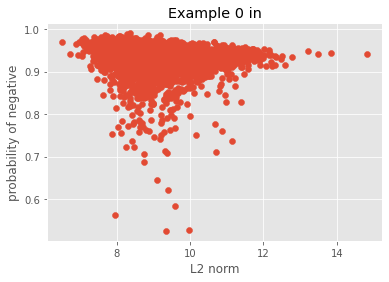

['work', 'have', 'plate', 'performance', 'performances'] 



100%|██████████| 4000/4000 [18:44<00:00,  3.56it/s]


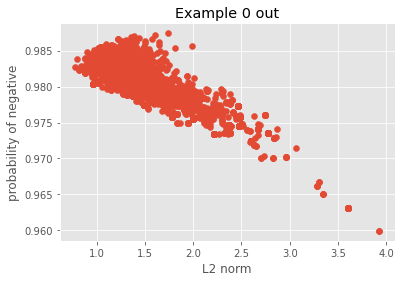





###### Example : 1 label negative ########
['idiot', 'enjoyed', 'complain', 'reckless', 'advise'] 



100%|██████████| 4000/4000 [15:17<00:00,  4.36it/s]


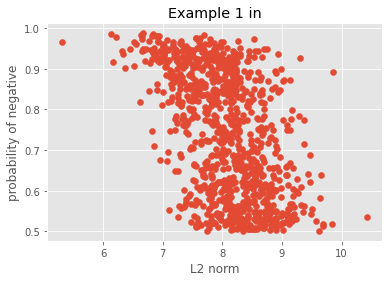

['fast', 'vision', 'sick', 'night', 'alive'] 



100%|██████████| 4000/4000 [18:43<00:00,  3.56it/s]


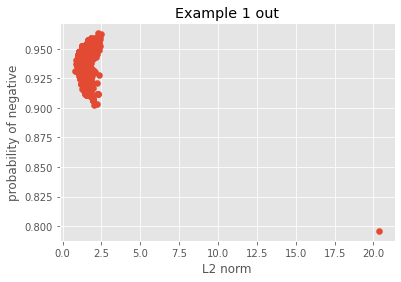





###### Example : 2 label negative ########
['boring', 'insists', 'storyline', 'arrives', 'revenge'] 



100%|██████████| 4000/4000 [18:48<00:00,  3.55it/s]


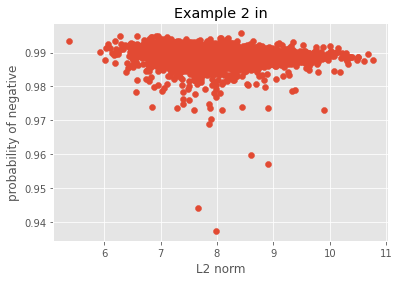

['pieces', 'done', 'sentence', 'musical', 'words'] 



100%|██████████| 4000/4000 [18:45<00:00,  3.55it/s]


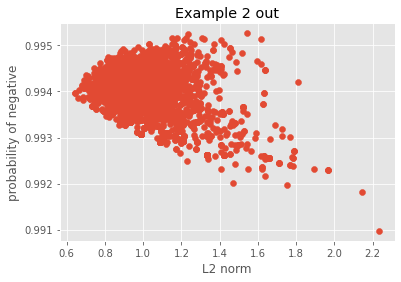

<Figure size 432x288 with 0 Axes>

In [ ]:

mask_out_top5(text[0], "negative", 0, "L2")






###### Example : 0 label positive ########
['fascinating', 'wonderful', 'loneliness', 'desperation', 'disturbing'] 



100%|██████████| 4000/4000 [18:25<00:00,  3.62it/s]


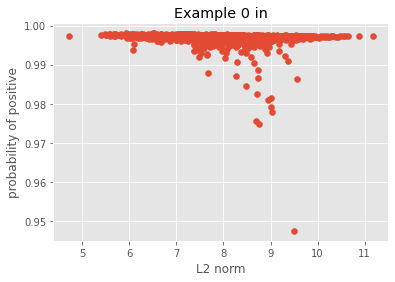

['pay', 'young', 'job', 'really', 'response'] 



100%|██████████| 4000/4000 [18:20<00:00,  3.63it/s]


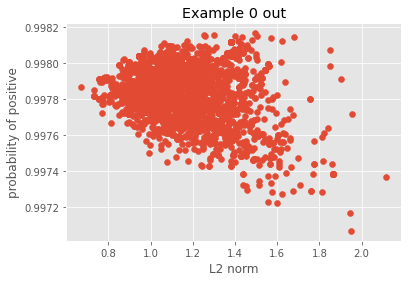





###### Example : 1 label positive ########
['unexpected', 'amazing', 'genius', 'animation', 'satirical'] 



100%|██████████| 4000/4000 [18:17<00:00,  3.64it/s]


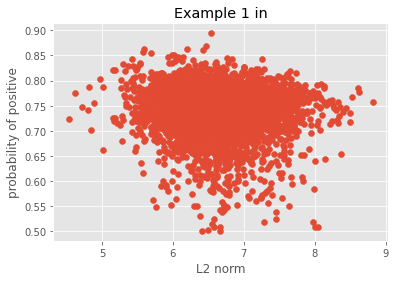

['black', 'kingdom', 'event', 'cameras', 'towers'] 



100%|██████████| 4000/4000 [18:14<00:00,  3.65it/s]


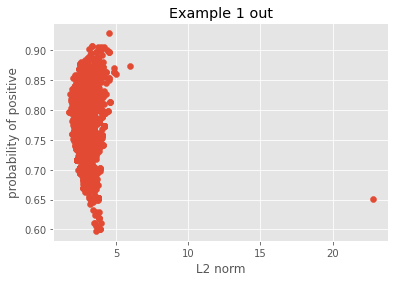





###### Example : 2 label positive ########
['wrote', 'loved', 'boring', 'hooked', 'beautifully'] 



100%|██████████| 4000/4000 [18:22<00:00,  3.63it/s]


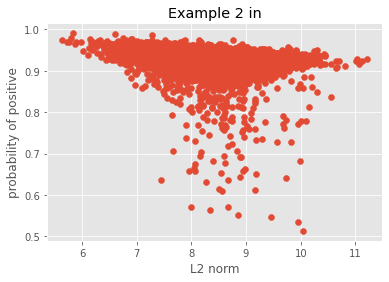

['people', '##rio', 'mouth', 'levels', 'hard'] 



 99%|█████████▉| 3970/4000 [18:11<00:08,  3.63it/s]

In [ ]:
mask_out_top5(text[1], "positive", 1, "L2",)

In [ ]:
mask_out_top5(text[0], "negative", 0, "Cosine")

In [ ]:
mask_out_top5(text[1], "positive", 1, "Cosine",)

In [ ]:
print(graph_attention)

In [ ]:
attention_graph(train_dataset_data[:100], train_dataset_label[:100], BATCH_SIZE)

In [ ]:
def remove_padding(x):
    ret = []
    for i in x[::-1]:
        if(i == "[PAD]"):
            continue
        else:
            ret.append(i)
    ret = ret[::-1]
    return ret

In [ ]:
for i, sent in enumerate(text):
    text[i] = remove_padding(sent)


In [ ]:
color = ["\033[1;31;47m", "\033[1;32;47m", "\033[1;33;47m", 
         "\033[1;34;47m", "\033[1;35;47m", "\033[1;36;47m",
         "\033[1;37;47m"]
mapping = ["Red", "Green", "Yellow", "Blue", "Purple", "Cyan", "White"]


In [ ]:
print("\033[1;32;47m" + text[0][0])

In [ ]:
reverse_mapping = {}
for i in mapping_ind:
    reverse_mapping[mapping_ind[i]] = i

In [ ]:
tokens = []
for lay in range(12):
    for i in graph_attention[lay]:
        l = 0
        for j in graph_attention[lay][i]:
            l += graph_attention[lay][i][j][0]
        l /= len(graph_attention[lay][i])
        tokens.append((l, reverse_mapping[i]))


In [ ]:
tokens_high_deg = []
for lay in range(12):
    for i in graph_attention[lay]:
        tokens_high_deg.append((len(graph_attention[lay][i]), reverse_mapping[i]))

In [ ]:
tokens.sort(reverse = True)
tokens_high_deg.sort(reverse = True)

In [ ]:
print(tokens[:10])
print(tokens_high_deg[:10])

In [ ]:
factor = 40
factor_2 = 20

In [ ]:
Truetop_tok = [i[1] for i in tokens[:len(mapping)*factor]]
top_tok_deg = [i[1] for i in tokens_high_deg[:len(mapping)*factor_2]]


In [ ]:
def parse_top_k(l, length):
    ret = []
    ind = 0
    mapping_check = {}
    while(len(ret) != length and ind < len(l)):
        if(l[ind][1] in mapping_check):
            ind += 1
            continue
        mapping_check[l[ind][1]] = 1
        ret.append(l[ind][1])
        ind += 1
    return ret
top_tok = parse_top_k(tokens, len(mapping)*factor)

top_tok_deg = parse_top_k(tokens_high_deg, len(mapping)*factor_2)

In [ ]:
print("Attention")
print(top_tok)
print("Degree ")
print(top_tok_deg)

In [ ]:
print(len(top_tok_deg))

In [ ]:
print(set(top_tok))


In [ ]:
print(set(top_tok_deg))

In [ ]:
def masking_text(tok, text, color):
    for i in range(len(text)):
        print("\t ###################### Example " + str(i) + " ##############")
        print("")
        masked_text = []
        for j in text[i]:
            flag = 0
            for ind in range(len(tok)):
                if(j == tok[ind]):
                    masked_text.append(color[ind//factor] + j + "\x1b[0m")
                    flag = 1
                    break
            if(flag == 0):
                masked_text.append(j)
        print(" ".join(masked_text))   
        
        print("")

In [ ]:
print("\t ####### Mapping for high attention value \n \n")
for i in range(len(mapping)):
    print(color[i], mapping[i], " : ", top_tok[i*factor : (i + 1)*factor])

In [ ]:
for i in range(len(mapping)):
    print(mapping[i], " : ", "(attention value) priority top : ", str(i*factor), "-", str((i + 1)*factor))

In [ ]:
print(masking_text(top_tok, text, color))

In [ ]:
print("\t ####### Mapping for Degree value \n \n")
for i in range(len(mapping)):
    print(color[i] ,mapping[i], " : ", top_tok_deg[i*factor_2 : (i + 1)*factor_2])

In [ ]:
for i in range(len(mapping)):
    print(mapping[i], " : ", "(degree) priority top : ", str(i*factor), "-", str((i + 1)*factor_2))

In [ ]:
print(masking_text(top_tok_deg, text, color))

In [ ]:
print(set(i[1] for i in tokens[:100]))

In [ ]:
print(set(i[1] for i in tokens_high_deg[:200]))

In [ ]:
import matplotlib.pyplot as plt

def plot_degree_dist(degrees):
    plt.hist(degrees)
    plt.show()


In [ ]:
for lay in range(12):
    degree = []
    for i in graph_attention[lay]:
        degree.append(len(graph_attention[lay][i]))
    degree.sort(reverse = True)
    plot_degree_dist(degree)
    